# BMEN 509 - Laboratory 1 - Image Domain
The purpose of this laboratory is to become familiar with digital images and how to work with images.
In this exercise, you will demonstrate 1) a basic understanding of digital image representation, 2)
an ability to perform simple operations on images, and 3) an understanding of fundamental image
processing techniques.

Your rubric is as follows:
<img src="NotebookImages/Rubric.png" alt="Rubric" width="600"/>

Please use this notebook to complete your assignment. Sections to be completed are blank and are marked by `TODO`. Please upload the notebook (.ipynn) and as a PDF (.pdf) by using File > Download as > PDF via LaTeX.

TODO: Bryce A. Besler, November 19th, 2018

### Objective
TODO

## Notebook Setup

In [27]:
# Library Imports
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage

# Setup Jupyter notebook specifics
%matplotlib inline

# Numpy printing help
np.set_printoptions(precision=2)

In [3]:
# Constants
data_directory = os.path.join('.', 'Data')
file_names = [
    'BreastUltrasound5.tif', 'T1Weighted8.jpg',
    'Thorax_PD.png', 'calcs_grids.tiff',
    'knee_ct2.tif', 'knee_xray2.tif',
    'mri_T2.tif', 'mri_brain.tif',
    'mri_pd.tif'
]

In [4]:
# Verify we can find our files
for file_name in file_names:
    name = os.path.join(data_directory, file_name)
    if not os.path.isfile(name):
        os.sys.exit('Cannot find file {}. Please make sure you have downloaded the data'.format(name))
print('Found all image files!')

Found all image files!


## Question 1 - Image Basics
Using the image BreastUltrasound5.tif do the following:
1. Load the image
2. Display the image
3. Give the image a title, x-axis label, y-axis label, and add a colorbar
4. What is the size of the image in the X and Y dimensions?
5. How many pixels are in the image?
6. Which corner of the image is the pixel (0,0)?
7. Plot the histogram of the image with 256 bins

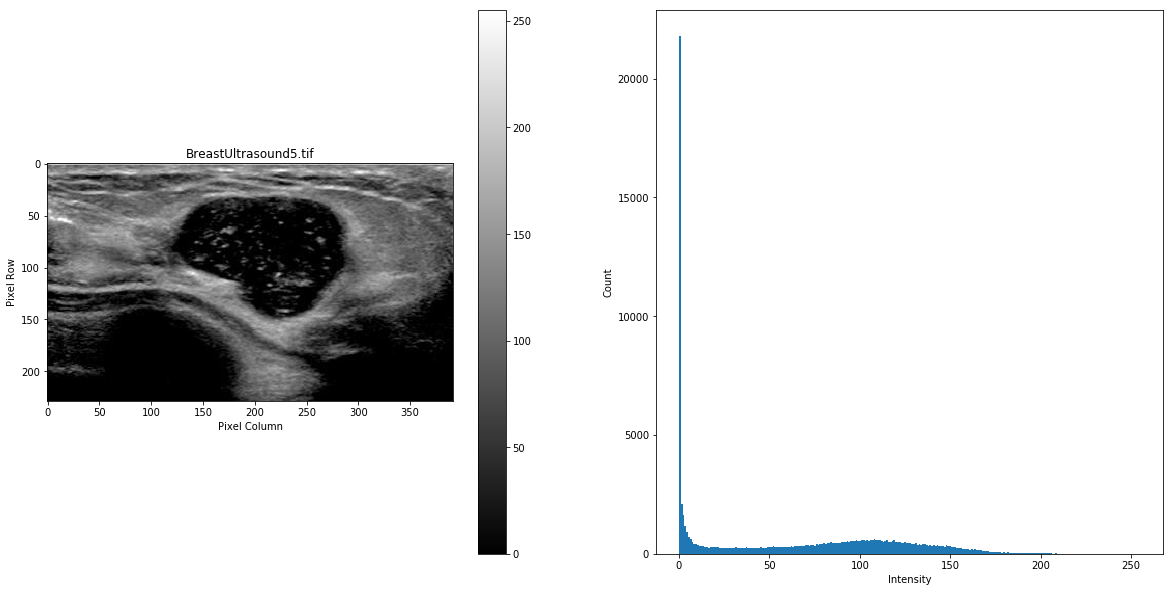

4. The Image has: 229 pixels in the X dimension and 392 pixels in the Y dimension
5. The image has 89768 pixels.
6. The top-left corner of the image is the pixel (0, 0), as seen by the image plot


In [8]:
# TODO: Implement
filename = os.path.join(data_directory, 'BreastUltrasound5.tif')
I = io.imread(filename)

# plot image with labels and color bar, and histogram with 256 bins
plt.subplots(1, 2, figsize=(20,10))
plt.subplot(1, 2, 1); plt.imshow(I, cmap='gray'); plt.title('BreastUltrasound5.tif'); plt.xlabel('Pixel Column'); plt.ylabel('Pixel Row'); plt.colorbar()
plt.subplot(1, 2, 2); plt.hist(I.ravel(), bins=256); plt.xlabel('Intensity'); plt.ylabel('Count')
plt.show()

print('4. The Image has: {0} pixels in the X dimension and {1} pixels in the Y dimension.'.format(I.shape[0], I.shape[1]))
print('5. The image has {} pixels.'.format(np.prod(I.shape)))
print('6. The top-left corner of the image is the pixel (0, 0), as seen by the image plot.')

## Question 2 - Transfer Functions
Window and Level is a common technique for visualizing biomedical images. You can visualize
specific tissues by expanding the contrast in a narrow range of gray values while ignore all other
gray values. Window and Level is easy to implement as a simple transfer function, given below.

<img src="NotebookImages/TransferFunction.jpg" alt="Transfer Function" width="400"/>

The linear transform is given by:

$$ J(x,y) = m * I(x,y) + b $$

Determine how to calculate m and b. If you get stuck, refer to the laboratory notes. Write a function
`window_level_function` that takes as input an image, a window, and a level and returns as output an image that has been
windowed and levelled. The output image should be an 8-bit unsigned integer.
The input image will need to be converted to a double and you will have to convert the output
image to an unsigned 8-bit integer. Remember that the maximum value for an 8-bit unsigned integer
is 255.

The code below loads the image `mri_T2.tif`. Using your function, it displays the image and its histogram at the
following windows and levels. The corresponding tissue for each window and level is given on the
right.

| Tissue | Window | Level |
|:------ |:------:|:-----:|
|Whole dynamic range|255|128|
|High contrast between white and gray matter|50|50|
|Background|10|20|
|Tumour|50|100|

After writing your function and running the given code, answer the following questions:

    1) Compare the histogram of the second window level transformation (W=50, L=50) to the histogram of the first window level transformation (W=255, L=128). Which values were truncated in the second window level transformation?
    2) In your own words, why does windowing and levelling allow us to see different tissues?

In [15]:
def window_level_function(image, window, level):
    # TODO: Implement this function
    float_image = image.astype(np.float32)
    min = 0
    max = 255
    # calculate m and b
    m = (max - min) / window
    b = max - (((max - min) / window) * (level + (window / 0.5)))
    
    # apply window/level function to image
    wl_image = m * float_image + b
    return wl_image.astype(np.uint8)

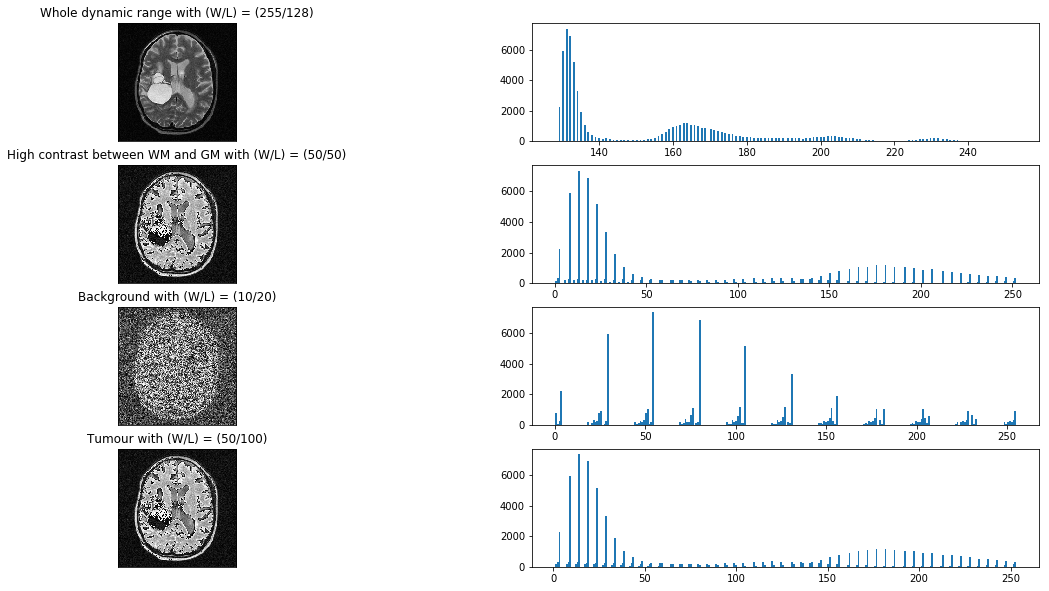

Question 1: Compare the histogram of the second window level transformation (W=50, L=50) to the histogram of the first window level transformation (W=255, L=128). Which values were truncated in the second window level transformation?
TODO: Answer

The pixels with intensities ranging from 128-140 are truncated in the second window level. These intensities have high counts in the 
first window level, and are drastically reduced in the second window level.

Question 2: In your own words, why does windowing and levelling allow us to see different tissues?
TODO: Answer

Window and levelling allows for pixels that fall within a specific range of intensity values to be visualized. Thus, tissues that are typically represented
by a certain intensity range in images will be visualized better (or worse) with varying window/level values.



In [17]:
image = io.imread(os.path.join(data_directory, 'mri_T2.tif'))

pairs = {
    'Whole dynamic range':             (255, 128),
    'High contrast between WM and GM': (50, 50),
    'Background':                      (10, 20),
    'Tumour':                          (50, 100)
}

i = 1
plt.subplots(len(pairs), 2, figsize=(20,10))
for key in pairs:
    window, level = pairs[key]

    new_image = window_level_function(image, window, level)
    
    plt.subplot(len(pairs), 2, 2*i-1)
    plt.imshow(new_image, cmap='gray')
    plt.title('{} with (W/L) = ({}/{})'.format(key, window, level))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(len(pairs), 2, 2*i)
    plt.hist(new_image.ravel(), bins=256)
    
    i += 1
plt.show()

print('''Question 1: Compare the histogram of the second window level transformation (W=50, L=50) to the histogram of the first window level transformation (W=255, L=128). Which values were truncated in the second window level transformation?
TODO: Answer

The pixels with intensities ranging from 128-140 are truncated in the second window level. These intensities have high counts in the 
first window level, and are drastically reduced in the second window level.
''')

print('''Question 2: In your own words, why does windowing and levelling allow us to see different tissues?
TODO: Answer

Window and levelling allows for pixels that fall within a specific range of intensity values to be visualized. Thus, tissues that are typically represented
by a certain intensity range in images will be visualized better (or worse) with varying window/level values.
''')

## Question 3 - Exploring a Gaussian Function
The Gaussian filter is one of the most powerful filters in image processing. Here, we are going to
explore the effects of changing the kernel size and the response size of a Gaussian filter to better
understand the parameters.

The code below loads the image `knee_ct2.tif` and displays the image. Next, it filters the image with a sigma of 2
and at five different kernel sizes: 3, 5, 7, 21 and 51. Next, it filters the image with a kernel size of 21
and at five different sigmas: 0.5, 1, 2, 3, 5. Plot the filtered image for all 11 responses.

Your objective is to write the function `gaussian_kernel`. This function creates a Gaussian kernel using the equation:

$$ J(x,y) = \frac{1}{\sqrt{2 \pi} \sigma} exp\left( - \frac{(x-\mu_x)^2 + (x-\mu_y)^2}{2 \sigma^2} \right) $$

where $\sigma$ determines the frequency response of the fitler and $(\mu_x, \mu_y)$ are the centers of the kernel. Note that the kernel size is also a parameter!

If you need help conceptualizing image convolution, I would recommend [Image Kernels Explained Visually](http://setosa.io/ev/image-kernels/).

In your own words, answer the following questions:
1. What is the effect of increasing the kernel size but keeping sigma constant?
2. What is the effect of increasing the sigma but keeping the kernel size constant?
3. Often a Gaussian filter is used to filter noise in an image. How should the parameters (sigma, kernel size) be chosen for filtering noise?
4. What is the disadvantage of making the kernel extremely large?

In [52]:
def gaussian_kernel(sigma, kernel_size): 
    # TODO: Implement this function
    kernel = np.zeros((kernel_size, kernel_size))
    centerx = kernel_size / 2
    centery = kernel_size / 2
    
    for i in range(kernel_size):
        for j in range(kernel_size):
            denom = 1 / ((math.sqrt(2 * math.pi)) * sigma)
            expon = math.exp(-((i - centerx)**2 + (j - centery)**2) / (2 * sigma**2))
            value = denom * expon
            kernel[i, j] = value
    
    return kernel

In [53]:
# Load image
image = io.imread(os.path.join(data_directory, 'knee_ct2.tif'))

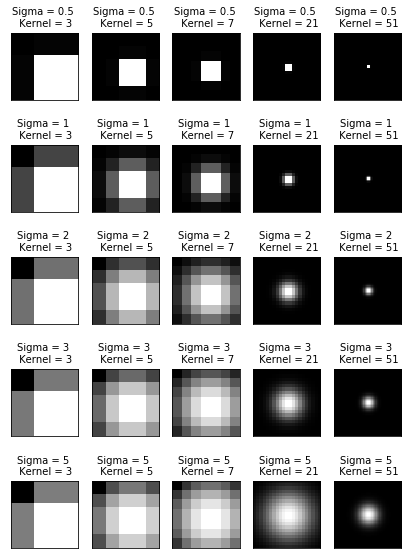

In [54]:
# Create kernels
sigmas = [0.5, 1, 2, 3, 5]
kernels = [3, 5, 7, 21, 51]

plt.subplots(len(sigmas), len(kernels), figsize=(7, 7))
for i, sigma in enumerate(sigmas):
    for j, kernel in enumerate(kernels):
            gauss = gaussian_kernel(sigma, kernel)

            plt.subplot(len(sigmas), len(kernels), j + i * len(sigmas) + 1)
            plt.imshow(gauss, cmap='gray')
            plt.title('Sigma = {} \n Kernel = {}'.format(sigma, kernel), fontsize=10)
            plt.xticks([])
            plt.yticks([])
plt.subplots_adjust(top = 1.2)
plt.show()

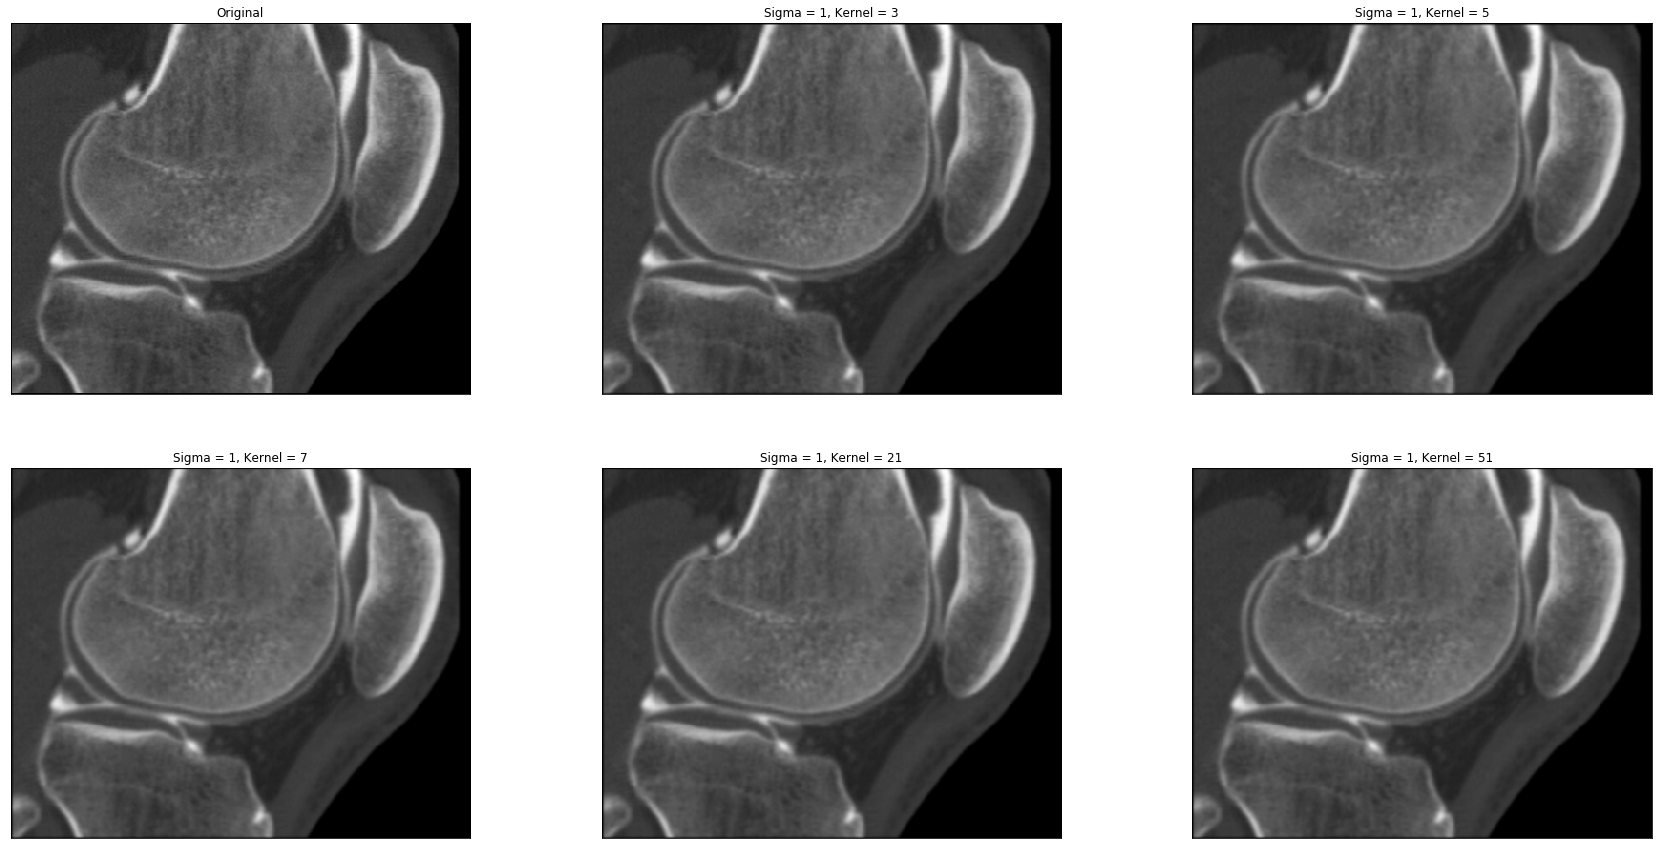

In [55]:
sigma = []
kernel = []

# Kernel sizes
sigma = 1
kernels = [3, 5, 7, 21, 51]

plt.subplots(2, (len(kernels)+1)//2, figsize=(30, 15))
plt.subplot(2, (len(kernels)+1)//2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])
i = 2
for kernel in kernels:
    gauss = gaussian_kernel(sigma, kernel)
    smooth_image = signal.convolve2d(image, gauss, boundary='pad', mode='same')

    plt.subplot(2, (len(kernels)+1)//2, i)
    plt.imshow(smooth_image, cmap='gray')
    plt.title('Sigma = {}, Kernel = {}'.format(sigma, kernel))
    plt.xticks([])
    plt.yticks([])

    i += 1
plt.show()

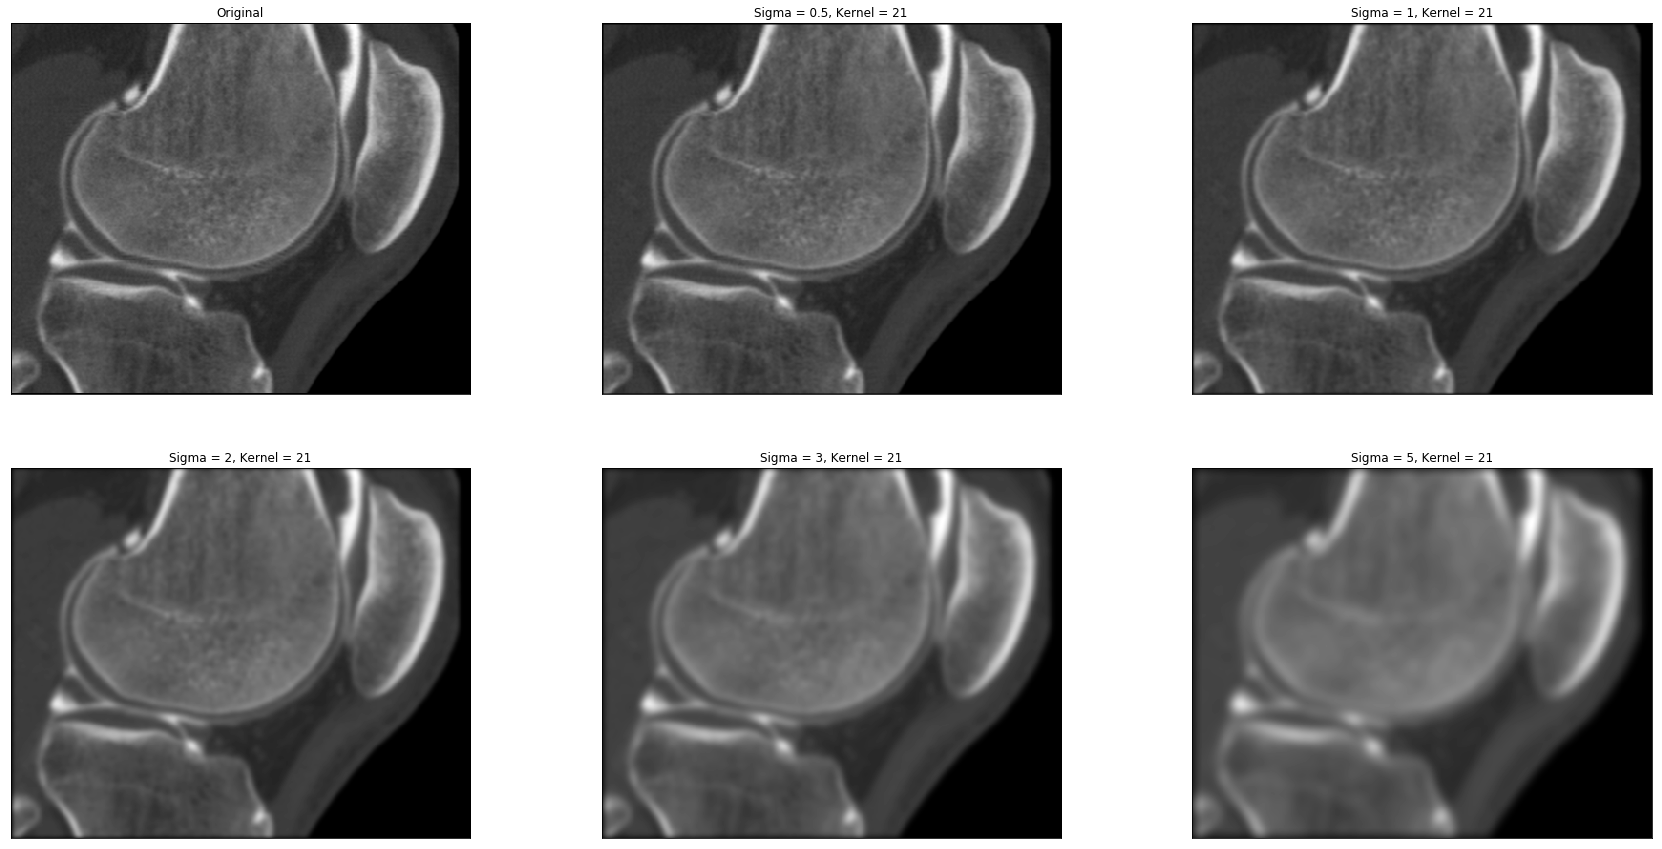

In [56]:
sigma = []
kernel = []

# Sigmas
sigmas = [0.5, 1, 2, 3, 5]
kernel = 21

plt.subplots(2, (len(kernels)+1)//2, figsize=(30, 15))
plt.subplot(2, (len(kernels)+1)//2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])
i = 2
for sigma in sigmas:
    gauss = gaussian_kernel(sigma, kernel)
    smooth = signal.convolve2d(image, gauss, boundary='pad', mode='same')
    
    plt.subplot(2, (len(kernels)+1)//2, i)
    plt.imshow(smooth, cmap='gray')
    plt.title('Sigma = {}, Kernel = {}'.format(sigma, kernel))
    plt.xticks([])
    plt.yticks([])

    i += 1
    
plt.show()

In [ ]:
print('''Question 1. What is the effect of increasing the kernel size but keeping sigma constant?
TODO: Answer
''')

print('''Question 2. What is the effect of increasing the sigma but keeping the kernel size constant?
TODO: Answer
''')

print('''Question 3. Often a Gaussian filter is used to filter noise in an image. How should the parameters (sigma, kernel size) be chosen for filtering noise?
TODO: Answer
''')

print('''Question 4. What is the disadvantage of making the kernel extremely large?
TODO: Answer
''')


## Question 4 - Understanding Signal, Noise, and Contrast
Qualitative description and quantitative metrics are complementary tools for assessing image processing algorithms. Metrics are free from observer variability, but can fail to capture nuance. In
this section, we are going to repeat the Gaussian and use the median filtering (see Lab01Ex05) but
include metrics for signal-to-noise ratio (SNR) and contrast-to-noise ratio (CNR).
Using the image `mri_pd.tif`, the code below does the following:
1. Loads the image and add salt and pepper noise (with noise density 0.1) and Gaussian noise (with mean 0, variance 0.01)
2. Filters the resulting noisy images with a median filter and a Gaussian filter with sigma 3
3. Selects two points on the image to compare contrast.
4. Computes the SNR for the image, the CNR for the two points, and plots the points and the images together.
5. Produces an image similar to the following, where the red and green points are the indices passed to the function.

<img src="NotebookImages/Brain.png" alt="Brain" width="400"/>

6. Plots the original image, the image with salt and pepper noise, and the image with Gaussian noise
7. Plots the salt and pepper noise image after median filtering and after Gaussian filtering
8. Plots the Gaussian noise image after median filtering and after Gaussian filtering

Your task is to write the functions `SNR` and `CNR` functions. Additionally, answer the following questions:
1. Qualitatively compare the original image to the Gaussian and salt and pepper noise images. What is the difference between Gaussian noise and salt and pepper noise?
2. Compare the median and Gaussian filtered salt and pepper noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
3. Compare the median and Gaussian filtered Gaussian noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
4. Does the best qualitative result always agree with the best numerical result? Why is it wise to visualize your images and not just rely on metrics?

In [57]:
def SNR(image):
    # TODO: Implement
    N = np.prod(image.shape)
    mean = np.mean(image)
    unbiased_std = math.sqrt(N / (N - 1)) * np.std(image)
    
    return mean / unbiased_std

def CNR(image, first_point, second_point):
    # TODO: Implement
    I1 = image[first_point[0], first_point[1]]
    I2 = image[second_point[0], second_point[1]]
    contrast = np.abs(I1 - I2)
    
    N = np.prod(image.shape)
    unbiased_std = math.sqrt(N / (N - 1)) * np.std(image)
    
    return contrast / unbiased_std

In [58]:
def add_gaussian_noise(image, mean, var):
    # Express the variance as a percentage of the data type
    std = np.sqrt(var)*(np.iinfo(image.dtype).max - np.iinfo(image.dtype).min)
    noise = std * np.random.randn(*image.shape) + mean
    return image + noise

def add_salt_and_pepper_noise(image, density):
    # Draw random var. With probability p, ceil at bottom. With probability p, floor at top
    probability = density / 2.0
    
    rand_image = np.random.rand(*image.shape)
    output = image.copy()
    output[ rand_image < probability ] = np.iinfo(image.dtype).min
    output[ np.logical_and(rand_image >= probability, rand_image < density) ] = np.iinfo(image.dtype).max
    
    return output

In [59]:
def plot_image_with_point(image, first_point, second_point, show=True):
    plt.imshow(image, cmap='gray')
    plt.scatter(first_point[0], first_point[1], c='g', s=20*4**2)
    plt.scatter(second_point[0], second_point[1], c='y', s=20*4**2)
    plt.title('SNR = {0:0.2f}, CNR = {1:0.2f}'.format(
        SNR(image),
        CNR(image, first_point, second_point)
    ))
    plt.xticks([])
    plt.yticks([])
    
    if show:
        plt.show()

Image and noise


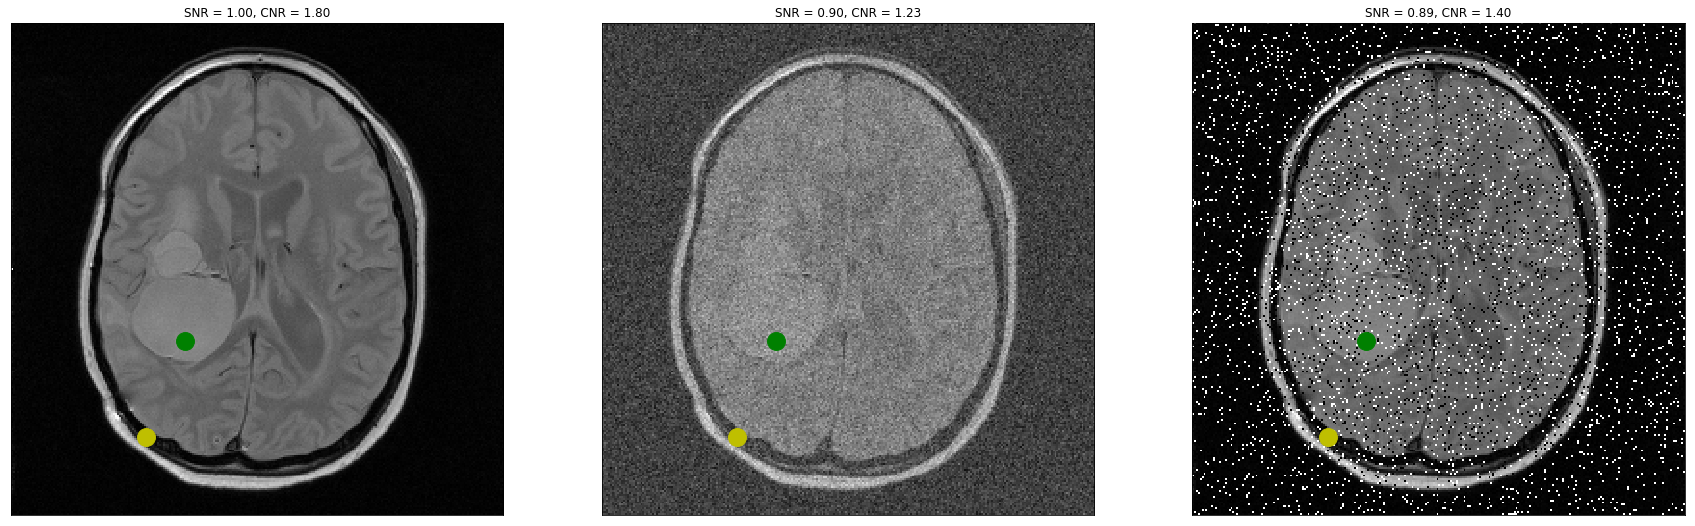

Salt & Pepper Noise


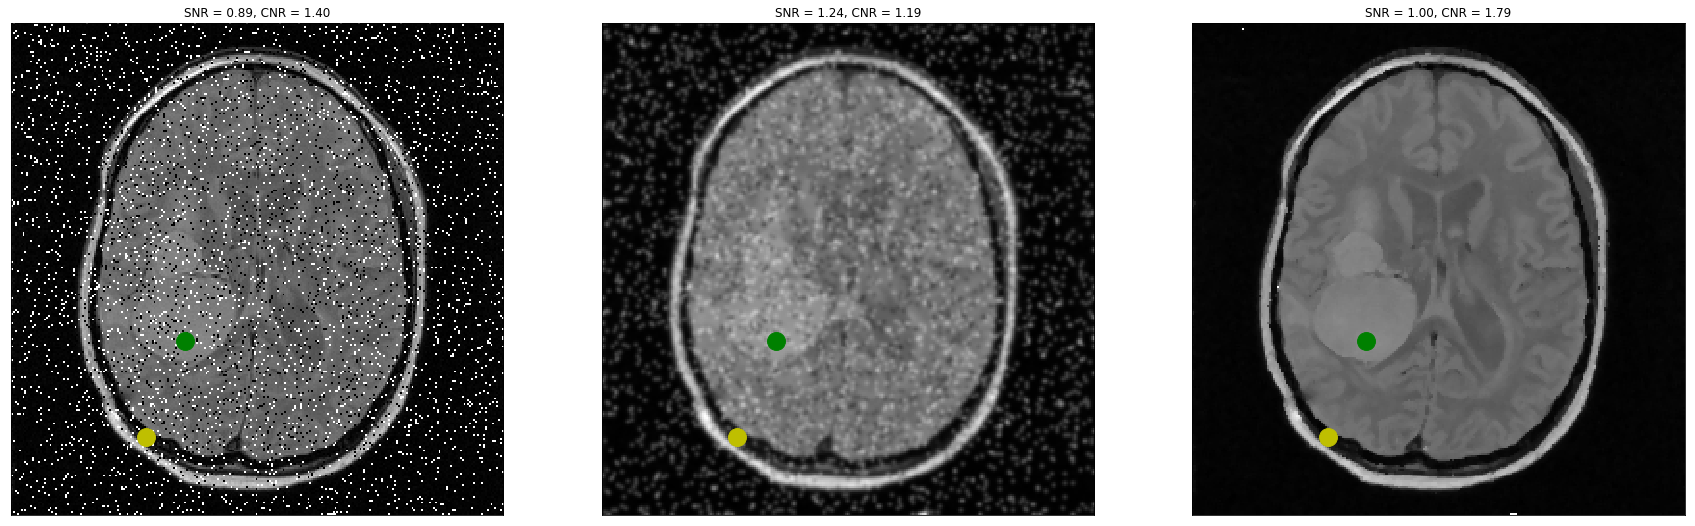

Gaussian Noise


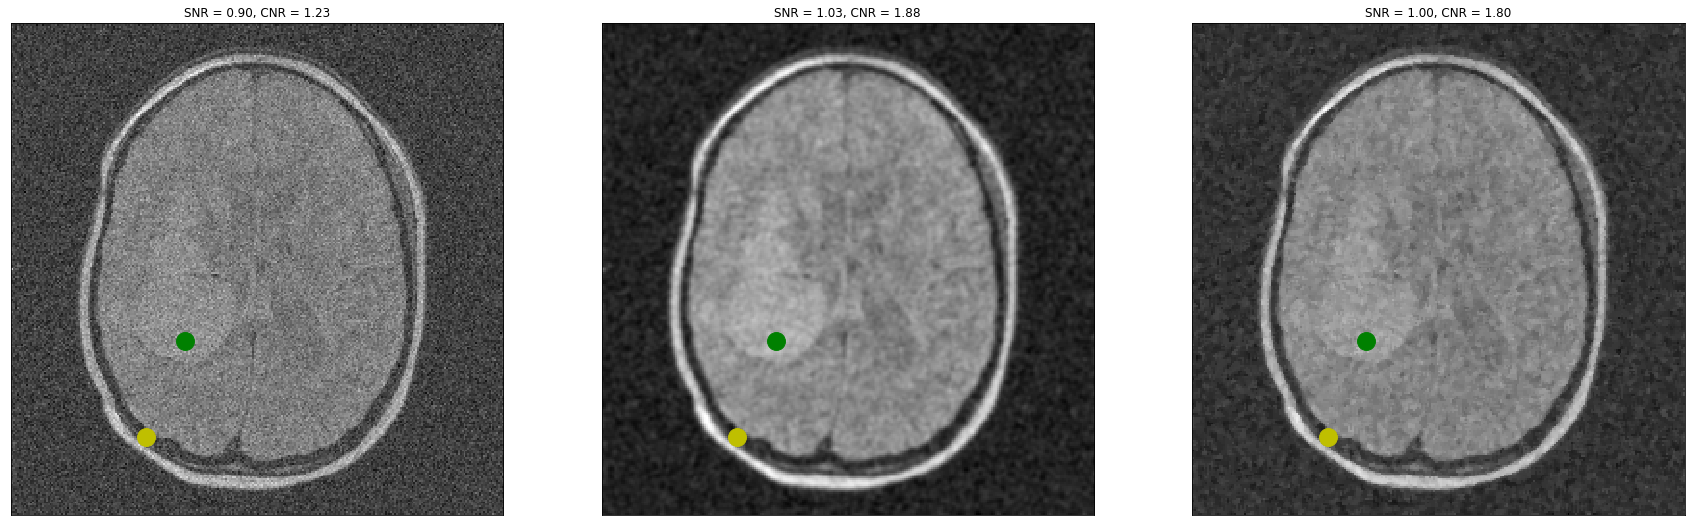

In [60]:
brain_point = (90, 165)
csf_point = (70, 215)

image = io.imread(os.path.join(data_directory, 'mri_pd.tif'))

gauss_noise = add_gaussian_noise(image, 0, 0.01)
med_noise = add_salt_and_pepper_noise(image, 0.1)

print('Image and noise')
plt.subplots(1, 3, figsize=(30, 10))
for i, this_image in enumerate([image, gauss_noise, med_noise]):
    plt.subplot(1, 3, i+1)
    plot_image_with_point(this_image, brain_point, csf_point, False)
plt.show()

print('Salt & Pepper Noise')
plt.subplots(1, 3, figsize=(30, 10))

plt.subplot(1, 3, 1)
plot_image_with_point(med_noise, brain_point, csf_point, False)
plt.subplot(1, 3, 2)
plot_image_with_point(ndimage.filters.gaussian_filter(med_noise, 1), brain_point, csf_point, False)
plt.subplot(1, 3, 3)
plot_image_with_point(ndimage.filters.median_filter(med_noise, 3), brain_point, csf_point, False)
plt.show()


print('Gaussian Noise')
plt.subplots(1, 3, figsize=(30, 10))

plt.subplot(1, 3, 1)
plot_image_with_point(gauss_noise, brain_point, csf_point, False)
plt.subplot(1, 3, 2)
plot_image_with_point(ndimage.filters.gaussian_filter(gauss_noise, 1), brain_point, csf_point, False)
plt.subplot(1, 3, 3)
plot_image_with_point(ndimage.filters.median_filter(gauss_noise, 3), brain_point, csf_point, False)
plt.show()

In [61]:
print('''Question 1. Qualitatively compare the original image to the Gaussian and salt and pepper noise images. What is the difference between Gaussian noise and salt and pepper noise?
TODO: Answer
''')
print('''Question 2. Compare the median and Gaussian filtered salt and pepper noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
TODO: Answer
''')
print('''Question 3. Compare the median and Gaussian filtered Gaussian noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
TODO: Answer
''')
print('''Question 4. Does the best qualitative result always agree with the best numerical result? Why is it wise to visualize your images and not just rely on metrics?
TODO: Answer
''')

Question 1. Qualitatively compare the original image to the Gaussian and salt and pepper noise images. What is the difference between Gaussian noise and salt and pepper noise?
TODO: Answer

Question 2. Compare the median and Gaussian filtered salt and pepper noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
TODO: Answer

Question 3. Compare the median and Gaussian filtered Gaussian noise images. Which filter produced the best CNR? Which filter produced the best SNR? From the perspective of a radiologist, which filter produced a qualitatively better image?
TODO: Answer

Question 4. Does the best qualitative result always agree with the best numerical result? Why is it wise to visualize your images and not just rely on metrics?
TODO: Answer



### Conclusion
TODO: Write your conclusion here